# 맥북 데이터
## 연식에 따른 중고가 데이터 분석
반비례(음의 선형관계)관계가 있는 것 같음

(80, 2)


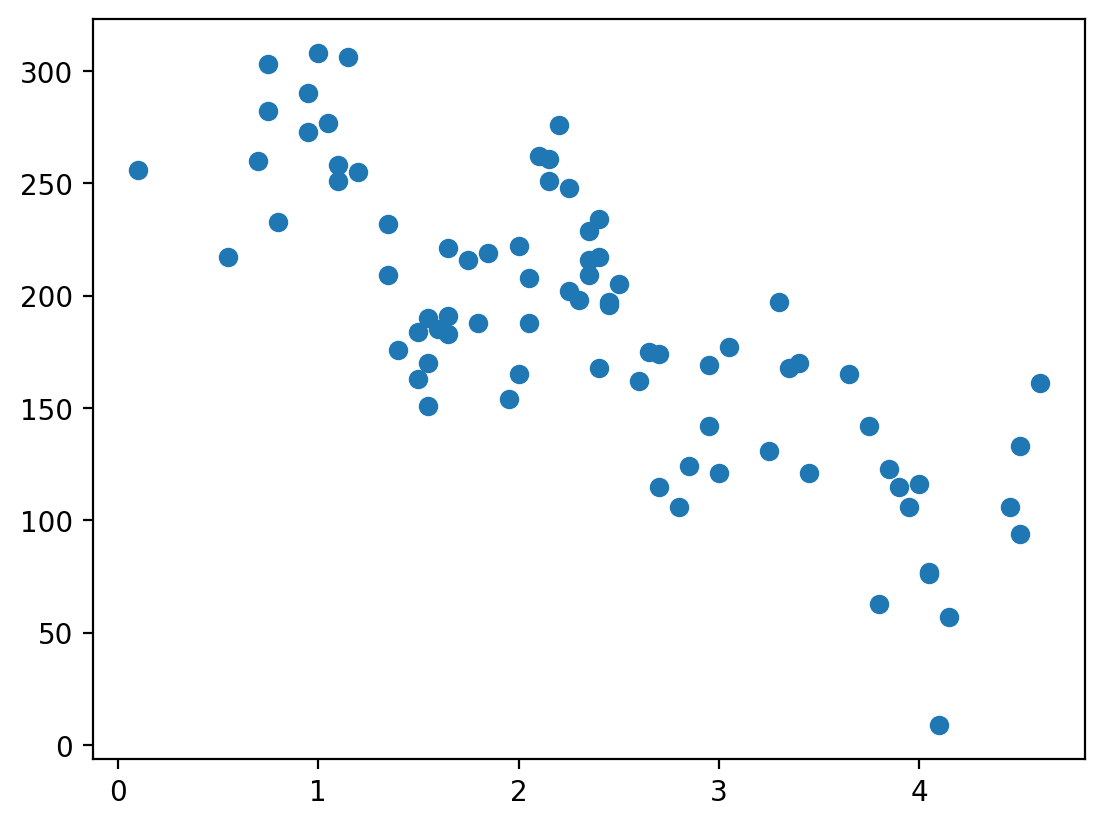

상관매트릭스
[[ 1.         -0.78972238]
 [-0.78972238  1.        ]]


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 출력한다.

macbook = pd.read_csv('./macbook.csv')
print(macbook.shape)
macbook.head()

plt.scatter(macbook['used_years'], macbook['price'])
plt.show()

print("상관매트릭스")
print(np.corrcoef(macbook['used_years'], macbook['price']))

In [9]:
x = macbook["used_years"].values
y = macbook["price"].values

아래 `def gradient` 함수에서 사용되는 수식은 수치미분(차분근사) 수식으로
$$f′(a)=\lim_{x→a} \frac{f(x)−f(a)}{x−a}​=\lim_{Δx→0} \frac{f(a+Δx)−f(a)}{Δx}​$$

`Δx`를 매우 작은 수인 0.0001로 임의로 지정

Iteration[0]: Loss 195.16275912183843 W=1.9528036736128342 b=0.003914455182439269
Iteration[100]: Loss 107.82167169237 W=53.703104630467124 b=-40.297688552963564
Iteration[200]: Loss 94.39279295875268 W=88.250188788488 b=-28.072363840645266
Iteration[300]: Loss 81.68975330362134 W=121.82428403445533 b=-16.106923749172665
Iteration[400]: Loss 70.03055873414722 W=153.98863944110508 b=-4.643867554458893
Iteration[500]: Loss 59.85200252312932 W=184.03818477235723 b=6.065491384679376
Iteration[600]: Loss 51.651628848930635 W=211.00109120727473 b=15.674802944834141
Iteration[700]: Loss 45.771719646768815 W=233.81484052901646 b=23.80539620283639
Iteration[800]: Loss 42.110626891610586 W=251.79406628520928 b=30.21301336837223
Iteration[900]: Loss 40.11694546885195 W=265.0438478530882 b=34.93510368187924
Iteration[1000]: Loss 39.13313332016789 W=274.34203689107994 b=38.248885733698444
Iteration[1100]: Loss 38.675256465461324 W=280.68159052100816 b=40.508239563981306
Iteration[1200]: Loss 38.468

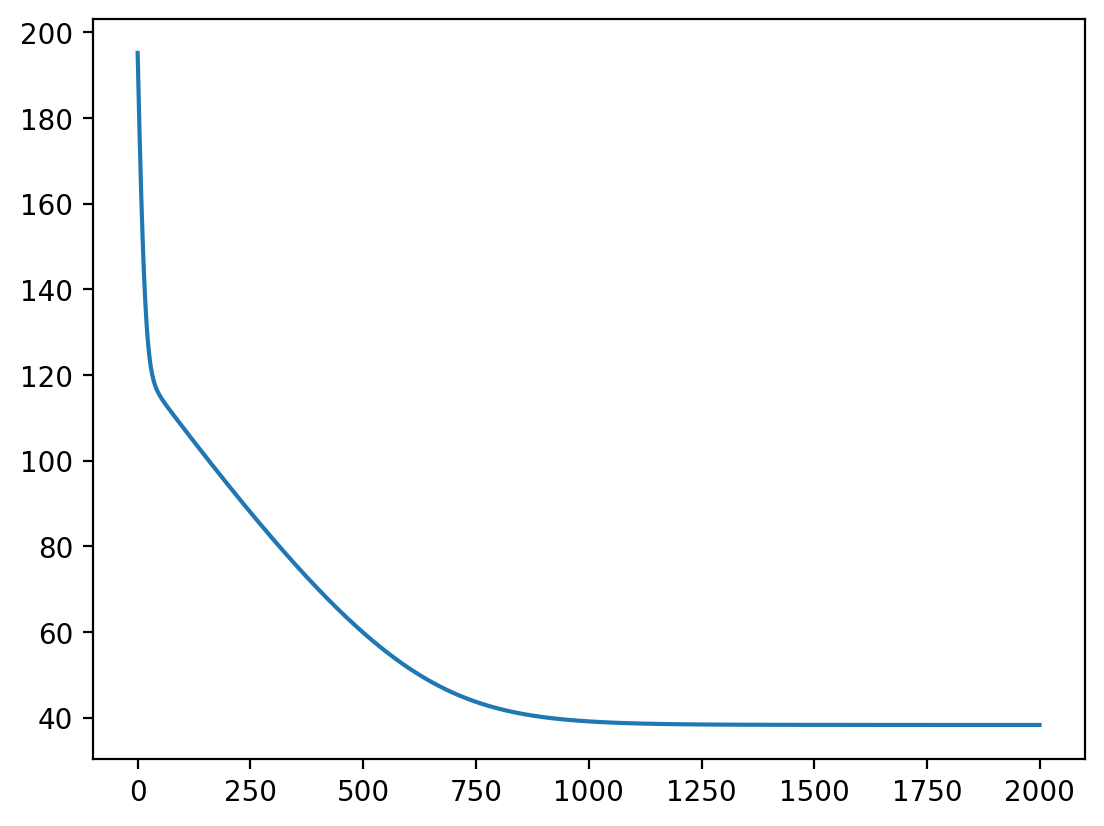

In [20]:
def model(x, w, b):
    y = w * x + b
    return y

def rmse(a, b):
    mse = ((a - b) ** 2).mean()
    rmse = mse ** 0.5
    return rmse

def loss(x, y, w, b):
    predictions = model(x, w, b)
    L = rmse(predictions, y)
    return L

def gradient(x, w, b, y):
    dw = (loss(x, w + 0.0001, b, y) - loss(x, w, b, y)) / 0.0001
    db = (loss(x, w, b + 0.0001, y) - loss(x, w, b, y)) / 0.0001
    return dw, db


def train(epoch=2000, learning_rate=1):
    w, b = 1, 2
    losses = []
    
    for i in range(epoch):
         dw, db = gradient(x, w, b, y)   # 3, 4번: 모델이 prediction을 예측하고, 손실함수값을 계산함과 동시에 기울기 계산
         w -= learning_rate * dw         # 5번: w = w - η * dw 로 업데이트
         b -= learning_rate * db         # 5번: b = b - η * db 로 업데이트 
         L = loss(x, w, b, y)            # 현재의 loss 값 계산
         losses.append(L)                # loss 값 기록
         
         if i % 100 == 0:
            print(f'Iteration[{i}]: Loss {L} W={w} b={b}')

    return losses, w, b

losses, w, b = train()

plt.plot(losses)
plt.show()

293.0807043367546 44.92716034171917


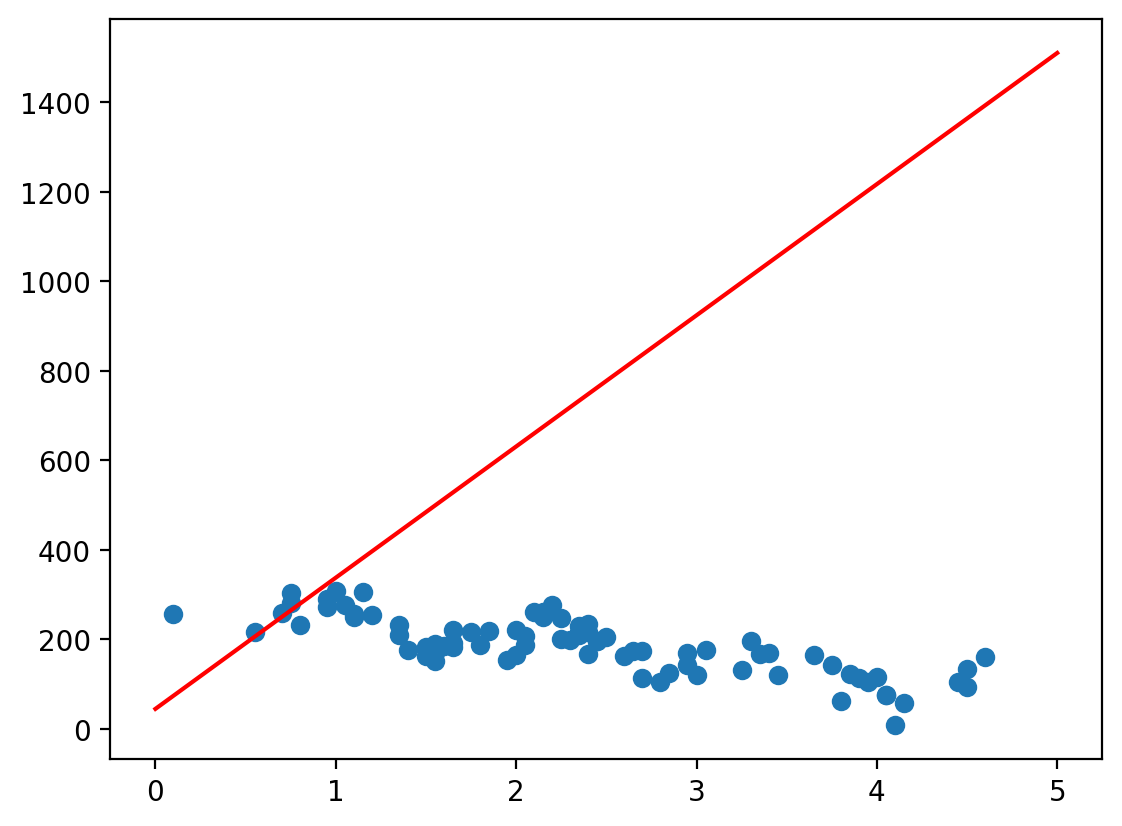

In [16]:
x_random = np.linspace(0, 5, 6)
y_pred = model(x_random, w, b)

print(w, b)


plt.plot(y_pred, c="r")
plt.scatter(macbook['used_years'], macbook['price'])

# 참고
[상관관계와 인과관계](https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation)